# 1. Importing Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# 2. Importing Data + Data Cleaning

## 2.1 Importing Data

Columns in the dataset are not given in a clear format. We manually created a list with all the colum names. For more details about the content of the columns visit the [UCI website](https://archive.ics.uci.edu/ml/datasets/automobile)

In [111]:
cols = ["symboling", 
        "normalized-losses", 
        "make", 
        "fuel-type", 
        "aspiration", 
        "num-of-doors", 
        "body-style", 
        "drive-wheels", 
        "engine-location", 
        "wheel-base", 
        "length", 
        "width", 
        "height",
        "curb-weight", 
        "engine-type", 
        "num-of-cylinders", 
        "engine-size", 
        "fuel-system", 
        "bore", 
        "stroke", 
        "compression-ratio", 
        "horsepower", 
        "peak-rpm", 
        "city-mpg", 
        "highway-mpg", 
        "price"]

In [112]:
data = pd.read_csv("imports-85.data", names = cols)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [113]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Let's review the na istance in our dataset

In [114]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Apparetnly it looks like no row has missing values. This is not True. Earlier we have seen that the 'normalized-losses' colum had quiet some missing values which have been stored as a string with a "?" sign.

## 2.2 Data Cleaning

### 2.2.1 Intro

First of all we begin by changing the ? value with nan so that we can check whether other columns also suffer from the same trend we spotted in the "normalized-losses" column.

In [115]:
data = data.replace('?', np.nan)
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Because 4 rows in the "price" column are found to be nan we decide to drop these four rows. Furthermore, we notice that "normalized-losses" has quiet a huge number of nan values. This can indicate that we potentially could drop the column if we find that there is to much variety in the data. 

In [116]:
data = data.dropna(subset=['price'])
data.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

After having dropped the four rows with the missing price we still have some values that are classifed as Nan. Let's now dig more specifically into each column to understand what the best solution to dealing with these missing values is.

### 2.2.2 "Normalized-Losses"

In [117]:
data["normalized-losses"].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
94      5
168     5
74      5
65      5
95      5
85      5
103     5
102     5
118     4
148     4
93      4
122     4
106     4
115     3
137     3
125     3
101     3
83      3
154     3
164     2
188     2
158     2
81      2
87      2
119     2
110     2
89      2
108     2
192     2
194     2
113     2
129     2
153     2
145     2
197     2
142     1
121     1
186     1
98      1
231     1
90      1
107     1
78      1
77      1
256     1
Name: normalized-losses, dtype: int64

As we mentioned earlier we see that 20.2% of the rows in the "normalized-losses" colum is stored as "?". Because the remaining datapoints are quiet spread out and there is no clear trend that can be found we conlude that the best option is to drop this column for our predictions rather than substituing the missing values with mean, median or mode. 

In [118]:
data = data.drop(["normalized-losses"], 1)
data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2.2.3 "make"

In [119]:
data["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

Although there are 22 different potential carmarkers in our dataset we believe that excluding this variable would hurt our predictions. Thus we transform the strings into a categorical variable.

In [120]:
data["make"] = data["make"].astype("category").cat.codes

### 2.2.4 "fuel-type" 

In [121]:
data["fuel-type"].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

We see that there is quiet an interesting split of gas and diesel cars. To capture this split we decide to transform this column into an encoded version that can be read by our model. 

In [122]:
gas_boo = []

for row in data["fuel-type"]:
    if row == "gas":
        row = 1.0
        gas_boo.append(row)
    elif row == "diesel":
        row = 0
        gas_boo.append(row)

In [123]:
data["is_gas"] = gas_boo

We can now drop the "fuel-type" column as we have captured the same data insights thanks to the creation of a new colum "is_gas"

In [124]:
data = data.drop(["fuel-type"], 1)

### 2.2.5 "aspiration"

In [125]:
data["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

Again we have a binary classificatio for this column. Hence, we will apply the same approach thta has been used earlier to capture the classification numerically. 

In [126]:
asp_boo = []

for row in data["aspiration"]:
    if row == "std":
        row = 1.0
        asp_boo.append(row)
    elif row == "turbo":
        row = 0
        asp_boo.append(row)

In [127]:
data["is_std"] = asp_boo
data = data.drop(["aspiration"], 1)

In [128]:
data.head()

,symboling,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std
0,3,0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0
1,3,0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0
2,1,0,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0
3,2,1,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0
4,2,1,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0


### 2.2.6 "num-of-doors"

Earlier we have seen that there were two missing values for this column. Before doing any data processing we need to fill the missing values. The best practice in this case is to use the mode as the variables are stored neither an interval nor ratio scale.

In [129]:
data["num-of-doors"].isnull().sum()

2

In [130]:
data["num-of-doors"].mode()

0    four
dtype: object

In [131]:
data["num-of-doors"] = data["num-of-doors"].fillna("four")

In [132]:
data["num-of-doors"].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

We repeat the same process for this column as it also is a binary classification. 

In [133]:
door_boo = []

for row in data["num-of-doors"]:
    if row == "four":
        row = 1.0
        door_boo.append(row)
    elif row == "two":
        row = 0
        door_boo.append(row)

In [134]:
data["is_four"] = door_boo
data = data.drop(["num-of-doors"], 1)

Finally, we review our changes

In [135]:
data.head()

,symboling,make,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four
0,3,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0,0.0
1,3,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0,0.0
2,1,0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0,0.0
3,2,1,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0,1.0
4,2,1,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0,1.0


### 2.2.7 "body-style"

In [136]:
data["body-style"].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

We notice that this column holds quiet a few categorical variables. These can also be converted into category codes which will allow our model to make more accurate predictions. Thus, we convert them and substitute the string with their category code.

In [137]:
data["body-style"] = data["body-style"].astype("category").cat.codes

We review our processing

In [138]:
data["body-style"].value_counts()

3    94
2    68
4    25
1     8
0     6
Name: body-style, dtype: int64

### 2.2.8 "drive-wheels"

In [139]:
data["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

To capture this difference we use the same approach of converting the earlier categorical variables. 

In [140]:
data["drive-wheels"] = data["drive-wheels"].astype("category").cat.codes

We review our changes

In [141]:
data.head()

,symboling,make,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four
0,3,0,0,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0,0.0
1,3,0,0,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0,0.0
2,1,0,2,2,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0,0.0
3,2,1,3,1,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0,1.0
4,2,1,3,0,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0,1.0


### 2.2.9 "engine-location"

In [142]:
data["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

Most of the datapoints in this column appear to be similar - except for 3. We will again convert the values into a boolean column. 

In [143]:
eng_boo = []

for row in data["engine-location"]:
    if row == "front":
        row = 1.0
        eng_boo.append(row)
    elif row == "rear":
        row = 0
        eng_boo.append(row)

In [144]:
data["is_front"] = eng_boo
data = data.drop(["engine-location"], 1)

So far our dataset looks like this

In [145]:
data.head()

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
0,3,0,0,2,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0,0.0,1.0
1,3,0,0,2,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0,0.0,1.0
2,1,0,2,2,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0,0.0,1.0
3,2,1,3,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0,1.0,1.0
4,2,1,3,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0,1.0,1.0


### 2.2.10 "engine-type"

In [146]:
data["engine-type"].value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64

Altough, the values for these datapoints may seem wrong they are actually in line with the datasets guidelines - [link](https://archive.ics.uci.edu/ml/datasets/automobile)

To capture these categorical variables we again use the earlier approch of converting them into an interger to while replicing the strings in the columns. 

In [147]:
data["engine-type"] = data["engine-type"].astype("category").cat.codes

In [148]:
data.head()

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
0,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0,0.0,1.0
1,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0,0.0,1.0
2,1,0,2,2,94.5,171.2,65.5,52.4,2823,4,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0,0.0,1.0
3,2,1,3,1,99.8,176.6,66.2,54.3,2337,2,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0,1.0,1.0
4,2,1,3,0,99.4,176.6,66.4,54.3,2824,2,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0,1.0,1.0


### 2.2.11 "num-of-cylinders"

In [149]:
data["num-of-cylinders"].value_counts()

four      157
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

We approach this categorical in a different way from the earlier ones. Each string is just a number stored by its name. Thus, we decide to replace those names we an actual float value. 

In [150]:
cy_cat = []
for row in data["num-of-cylinders"]:
    if row == "two":
        row = 2.0
        cy_cat.append(row)
    elif row == "four":
        row = 4.0
        cy_cat.append(row)
    elif row == "three":
        row = 3.0
        cy_cat.append(row)
    elif row == "five":
        row = 5.0
        cy_cat.append(row)
    elif row == "six":
        row = 6.0
        cy_cat.append(row)
    elif row == "eight":
        row = 8.0
        cy_cat.append(row)
    elif row == "twelve":
        row = 12.0
        cy_cat.append(row)

In [151]:
data["num-of-cylinders"] = cy_cat

In [152]:
data.head()

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
0,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0,0.0,1.0
1,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0,0.0,1.0
2,1,0,2,2,94.5,171.2,65.5,52.4,2823,4,6.0,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0,0.0,1.0
3,2,1,3,1,99.8,176.6,66.2,54.3,2337,2,4.0,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0,1.0,1.0
4,2,1,3,0,99.4,176.6,66.4,54.3,2824,2,5.0,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0,1.0,1.0


### 2.2.12 "fuel-system"

In [153]:
data["fuel-system"].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [154]:
data["fuel-system"] = data["fuel-system"].astype("category").cat.codes
data.head()

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
0,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,4.0,130,5,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0,0.0,1.0
1,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,4.0,130,5,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0,0.0,1.0
2,1,0,2,2,94.5,171.2,65.5,52.4,2823,4,6.0,152,5,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0,0.0,1.0
3,2,1,3,1,99.8,176.6,66.2,54.3,2337,2,4.0,109,5,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0,1.0,1.0
4,2,1,3,0,99.4,176.6,66.4,54.3,2824,2,5.0,136,5,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0,1.0,1.0


We have dealt with all binary/categorical variables in the dataset. However, we are interested in understanding whether this manipulation actually increases our predictions or whether it ads useless complexity to our model. Thus, we store all the columns into a list which will later allow us to run separate predictions for an entirely numerical dataset and our manipulated one. 

In [155]:
manipulated_col = ["fuel-system", 
                   "num-of-cylinders", 
                   "engine-type", 
                   "is_gas", 
                   "is_std", 
                   "is_four", 
                   "is_front", 
                   "drive-wheels", 
                   "body-style", 
                   "make", 
                   "symboling"]

### 2.2.13 Dealing with Nan Values

Earlier we saw that after our initial removal of "normalized-losses" and 4 rows of the dataset some NaN values were still present in the dataset. We now explore every single column to understand if there are some overlapses in the rows that have missing data. 

#### 2.2.13.1 "bore" & "stroke"

In [156]:
data[data["bore"].isnull() == True]

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
55,3,8,2,2,95.3,169.0,65.7,49.6,2380,5,2.0,70,2,NaN,NaN,9.4,101,6000,17,23,10945,1.0,1.0,0.0,1.0
56,3,8,2,2,95.3,169.0,65.7,49.6,2380,5,2.0,70,2,NaN,NaN,9.4,101,6000,17,23,11845,1.0,1.0,0.0,1.0
57,3,8,2,2,95.3,169.0,65.7,49.6,2385,5,2.0,70,2,NaN,NaN,9.4,101,6000,17,23,13645,1.0,1.0,0.0,1.0
58,3,8,2,2,95.3,169.0,65.7,49.6,2500,5,2.0,80,5,NaN,NaN,9.4,135,6000,16,23,15645,1.0,1.0,0.0,1.0


Interestingly enough we notice that the 4 rows which have missing values for the "bore" column are the same for the "stroke" one. We now analyse the distribution of the values in both columns and see whether it is prudent to replace them or we are better of just removing them.

In [157]:
data.dtypes

symboling              int64
make                    int8
body-style              int8
drive-wheels            int8
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type             int8
num-of-cylinders     float64
engine-size            int64
fuel-system             int8
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
is_gas               float64
is_std               float64
is_four              float64
is_front             float64
dtype: object

In [158]:
bore = data["bore"].value_counts()
stroke = data["stroke"].value_counts()
print(bore.head(), stroke.head())

3.62    23
3.19    20
3.15    15
2.97    12
3.03    10
Name: bore, dtype: int64 3.40    19
3.15    14
3.03    14
3.23    14
3.39    13
Name: stroke, dtype: int64


It looks like both values are quite different from one another, with no dominant value in the dataset. This means we cannot use a mode to substitue the missing values. However, we assume that the decimal points may have a meaning. Thus, we decide to avoid creating an entirly new value by compunding the mean and pick the median as our safeoption.

In [159]:
data["bore"] = data["bore"].fillna(data["bore"].median())

The same logic applies to the missing values in the "stroke" column

In [160]:
data["stroke"] = data["stroke"].fillna(data["stroke"].median())

#### 2.2.13.1 "horsepower" & "peak-rpm"

In [161]:
data[data["horsepower"].isnull() == True]

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
130,0,16,4,1,96.1,181.5,66.5,55.2,2579,2,4.0,132,5,3.46,3.90,8.7,NaN,NaN,23,31,9295,1.0,1.0,1.0,1.0
131,2,16,2,1,96.1,176.8,66.6,50.5,2460,2,4.0,132,5,3.46,3.90,8.7,NaN,NaN,23,31,9895,1.0,1.0,0.0,1.0


Again we notice that the two rows that have missing values for the "horsepower" and the "peak-rpm" columns are the same. We apply the same procedure to these two values as we did for the earlier four. Thus, we replace all missing values in these two columns with their median.

In [162]:
data["horsepower"] = data["horsepower"].fillna(data["horsepower"].median())

In [163]:
data["peak-rpm"] = data["peak-rpm"].fillna(data["peak-rpm"].median())

### 2.3 Data Cleaning - Summary

The main steps we undertook:
1. We dropped the "normlized-losses" column because it had too many missing values (>20% of the whole dataset)
2. We removed the 4 missing rows in the price column.
3. We cleaned 11 columns all which had categorical variables: 
   - Four of them were binary and have been changed with dummy column.
   - The remaing ones have been attributed an interger from 1 to the total number of categories.
4. We reviewed each remaining missing value and changed it with the respective median of the column. 

The final dataset (before normalisation):

In [164]:
data.head()

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
0,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,4.0,130,5,3.47,2.68,9.0,111,5000,21,27,13495,1.0,1.0,0.0,1.0
1,3,0,0,2,88.6,168.8,64.1,48.8,2548,0,4.0,130,5,3.47,2.68,9.0,111,5000,21,27,16500,1.0,1.0,0.0,1.0
2,1,0,2,2,94.5,171.2,65.5,52.4,2823,4,6.0,152,5,2.68,3.47,9.0,154,5000,19,26,16500,1.0,1.0,0.0,1.0
3,2,1,3,1,99.8,176.6,66.2,54.3,2337,2,4.0,109,5,3.19,3.40,10.0,102,5500,24,30,13950,1.0,1.0,1.0,1.0
4,2,1,3,0,99.4,176.6,66.4,54.3,2824,2,5.0,136,5,3.19,3.40,8.0,115,5500,18,22,17450,1.0,1.0,1.0,1.0


# 3. Feautre Engeeniring

As we know have cleaned all the data few important steps need to be undertaken to ensure that the error metrics we will use to evaluate the predictions yielded by the model are unbiased.

## 3.1 Normalisation

In [165]:
data.isnull().sum()

symboling            0
make                 0
body-style           0
drive-wheels         0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
is_gas               0
is_std               0
is_four              0
is_front             0
dtype: int64

We notice that there are no null values. Let's review the data type to see whether all ojects are stored with the right format.

In [166]:
data.dtypes

symboling              int64
make                    int8
body-style              int8
drive-wheels            int8
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type             int8
num-of-cylinders     float64
engine-size            int64
fuel-system             int8
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
is_gas               float64
is_std               float64
is_four              float64
is_front             float64
dtype: object

We notice that some variables are stored as object. Thus, we need to convert them in a model-readable format. 

In [167]:
data = data.astype("float")
data.dtypes

symboling            float64
make                 float64
body-style           float64
drive-wheels         float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type          float64
num-of-cylinders     float64
engine-size          float64
fuel-system          float64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
is_gas               float64
is_std               float64
is_four              float64
is_front             float64
dtype: object

We now can proceed and normalised the values

In [168]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = data['price']
data = (data - data.min())/(data.max() - data.min())
data['price'] = price_col

In [169]:
data.head()

,symboling,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,is_gas,is_std,is_four,is_front
0,1.0,0.000000,0.00,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.0,0.2,0.260377,0.714286,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0,1.0,1.0,0.0,1.0
1,1.0,0.000000,0.00,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.0,0.2,0.260377,0.714286,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0,1.0,1.0,0.0,1.0
2,0.6,0.000000,0.50,1.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.8,0.4,0.343396,0.714286,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0,1.0,1.0,0.0,1.0
3,0.8,0.047619,0.75,0.5,0.384840,0.529851,0.504274,0.541667,0.329325,0.4,0.2,0.181132,0.714286,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0,1.0,1.0,1.0,1.0
4,0.8,0.047619,0.75,0.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.4,0.3,0.283019,0.714286,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0,1.0,1.0,1.0,1.0


# 4. Univariate KNN

In [170]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

The model will be evaluated with a holdout validiation, which divides the dataset into two equal parts: Train_set, Test_set.

In [171]:
def train_test_knn(x, y, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 4)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    #Separating the training features
    train_x = train_df[[x]]
    train_y = train_df[y]
    test_x = test_df[[x]]
    
    knn.fit(train_x, train_y)
    predictions = knn.predict(test_x)
    mse = mean_squared_error(test_df[y], predictions)
    rmse = mse **(1/2)
    return rmse

Now that we created a function that is able to compute the rmse for a prediction we utilise a loop to apply it for every feature. 

In [172]:
rmse_results = {}
train_cols = data.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = train_test_knn(col, 'price', data)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          4182.633553
curb-weight          4286.052505
horsepower           4867.914069
highway-mpg          4944.484557
city-mpg             5060.677257
width                5322.510643
num-of-cylinders     5879.922366
length               5959.236874
drive-wheels         6855.329964
wheel-base           6882.323641
bore                 6938.814393
fuel-system          7397.063139
make                 7407.258749
compression-ratio    7438.848432
peak-rpm             7675.854466
symboling            7912.662830
height               8207.818750
stroke               8514.698338
engine-type          8645.003829
is_std               8788.981498
body-style           8821.341230
is_four              8954.787162
is_gas               9151.140098
is_front             9351.928321
dtype: float64

We notice that some of the non-numerical variables we have manipulated earlier have outperformed better than certain numerical values in the dataset. This insight will be quiet interesting when we train a multivariate model, especially when deciding which features to include and which one's to exclude.

## 4.1 Hyperparameter Tuning

In [173]:
def train_test_knn_hyp(x, y, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 4)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    #Separating the training features
    train_x = train_df[[x]]
    train_y = train_df[y]
    test_x = test_df[[x]]
    
    k_values = [1,2,3,4,5,6,7,8,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_x, train_y)
        predictions = knn.predict(test_x)
        mse = mean_squared_error(test_df[y], predictions)
        rmse = mse ** (1/2)
        k_rmses[k] = rmse
    return k_rmses
 

We now review our results for each feature.

In [174]:
k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = data.columns.drop('price')
for col in train_cols:
    rmse_val = train_test_knn_hyp(col, 'price', data)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'symboling': {1: 8831.951383006368,
  2: 8680.002218123134,
  3: 8574.717677707615,
  4: 8556.612801145391,
  5: 7912.662830079174,
  6: 7995.325333537694,
  7: 7975.753478499949,
  8: 7961.725119190647,
  9: 7958.554178490563},
 'make': {1: 4964.358205987053,
  2: 6115.43404967252,
  3: 7110.428039511916,
  4: 7359.742578459661,
  5: 7407.258748691464,
  6: 7460.491840798602,
  7: 7303.376582125413,
  8: 7441.402440644503,
  9: 7610.17093616853},
 'body-style': {1: 9460.268797897701,
  2: 8877.958492060829,
  3: 8698.976666955965,
  4: 8805.23969911895,
  5: 8821.341229568032,
  6: 8494.193362942082,
  7: 8489.230098289894,
  8: 8462.494380090968,
  9: 8548.833301816974},
 'drive-wheels': {1: 8914.860289434291,
  2: 9222.338212871115,
  3: 7553.546754747662,
  4: 7300.0405930786455,
  5: 6855.32996424501,
  6: 7117.205113114885,
  7: 6428.853910949092,
  8: 6486.400002860034,
  9: 6316.328860751677},
 'wheel-base': {1: 6488.459231487511,
  2: 7082.528847277402,
  3: 6764.965297587049

Let's visualise it graphically

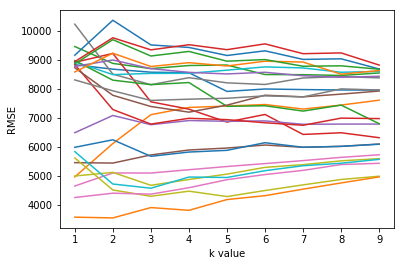

In [175]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# 5. KNN Multivariate

Up to now we have trained only a model that only used one feature to evaluate the price. Let's see how the same approach works for a model that uses more than one feature. 

Thanks to the earlier results we can compund the average of the rmse values for each k value and see which features on average can be classified as the best predictiors. 

In [176]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()[:10]

engine-size         4178.284145
curb-weight         4692.350478
horsepower          4838.154632
city-mpg            5168.343543
highway-mpg         5173.928984
width               5299.632338
length              5848.175807
num-of-cylinders    5982.390242
wheel-base          6819.095463
make                6974.740380
dtype: float64

Although, most of the non-numerical variables have performed quite poorly some still manage to place into the top ten. We will now try to run a model that uses the 2-10 best features according to the earlier compunded avg. rmse.

In [177]:
def multi_knn_train_test(x, y, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 4)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    #Separating the training features
    train_x = train_df[x]
    train_y = train_df[y]
    test_x = test_df[x]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_x, train_y)
        predictions = knn.predict(test_x)
        mse = mean_squared_error(test_df[y], predictions)
        rmse = mse ** (1/2)
        k_rmses[k] = rmse
    return k_rmses

In [178]:
two_best_features = ["engine-size", "curb-weight"]
three_best_features = ["engine-size", "curb-weight", "horsepower"]
four_best_features = ["engine-size", "curb-weight", "horsepower", "city-mpg"]
five_best_features = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg"]
six_best_features = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg", "width"]
seven_best_features = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg", "width", "length"]
eight_best_features = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg", "width", "length", "num-of-cylinders"]
nine_best_features = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg", "width", "length", "num-of-cylinders", "wheel-base"]
ten_best_features = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg", "width", "length", "num-of-cylinders", "wheel-base", "make"]

In [179]:
k_rmse_results = {}

rmse_val = multi_knn_train_test(two_best_features, 'price', data)
k_rmse_results["two best features"] = rmse_val

rmse_val = multi_knn_train_test(three_best_features, 'price', data)
k_rmse_results["three best features"] = rmse_val

rmse_val = multi_knn_train_test(four_best_features, 'price', data)
k_rmse_results["four best features"] = rmse_val

rmse_val = multi_knn_train_test(five_best_features, 'price', data)
k_rmse_results["five best features"] = rmse_val

rmse_val = multi_knn_train_test(six_best_features, 'price', data)
k_rmse_results["six best features"] = rmse_val

rmse_val = multi_knn_train_test(seven_best_features, 'price', data)
k_rmse_results["seven best features"] = rmse_val

rmse_val = multi_knn_train_test(eight_best_features, 'price', data)
k_rmse_results["eight best features"] = rmse_val

rmse_val = multi_knn_train_test(nine_best_features, 'price', data)
k_rmse_results["nine best features"] = rmse_val

rmse_val = multi_knn_train_test(ten_best_features, 'price', data)
k_rmse_results["ten best features"] = rmse_val

k_rmse_results

{'two best features': {5: 4113.825913536864},
 'three best features': {5: 3873.755814785282},
 'four best features': {5: 3974.952543846003},
 'five best features': {5: 4425.441549743786},
 'six best features': {5: 4109.651327373502},
 'seven best features': {5: 4154.841706853177},
 'eight best features': {5: 4165.96646500541},
 'nine best features': {5: 4468.233604053995},
 'ten best features': {5: 4311.039372071388}}

Overall, it looks like the best results are yielded by a three feature multivariate model. Let's see if by changing the k-value for our model something changes.

In [180]:
def multi_knn_train_test(x, y, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 4)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    #Separating the training features
    train_x = train_df[x]
    train_y = train_df[y]
    test_x = test_df[x]
    
    k_values = [1,2,3,4,5,6,7,8,9,10]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_x, train_y)
        predictions = knn.predict(test_x)
        mse = mean_squared_error(test_df[y], predictions)
        rmse = mse ** (1/2)
        k_rmses[k] = rmse
    return k_rmses

In [181]:
k_rmse_results = {}

rmse_val = multi_knn_train_test(two_best_features, 'price', data)
k_rmse_results["two best features"] = rmse_val

rmse_val = multi_knn_train_test(three_best_features, 'price', data)
k_rmse_results["three best features"] = rmse_val

rmse_val = multi_knn_train_test(four_best_features, 'price', data)
k_rmse_results["four best features"] = rmse_val

rmse_val = multi_knn_train_test(five_best_features, 'price', data)
k_rmse_results["five best features"] = rmse_val

rmse_val = multi_knn_train_test(six_best_features, 'price', data)
k_rmse_results["six best features"] = rmse_val

rmse_val = multi_knn_train_test(seven_best_features, 'price', data)
k_rmse_results["seven best features"] = rmse_val

rmse_val = multi_knn_train_test(eight_best_features, 'price', data)
k_rmse_results["eight best features"] = rmse_val

rmse_val = multi_knn_train_test(nine_best_features, 'price', data)
k_rmse_results["nine best features"] = rmse_val

rmse_val = multi_knn_train_test(ten_best_features, 'price', data)
k_rmse_results["ten best features"] = rmse_val

k_rmse_results

{'two best features': {1: 4072.23624800952,
  2: 3785.713850029428,
  3: 3965.629929166277,
  4: 4008.7328578776383,
  5: 4113.825913536864,
  6: 4376.875580158397,
  7: 4592.283322995728,
  8: 4573.569430236668,
  9: 4741.838101067059,
  10: 4954.97211942758},
 'three best features': {1: 3469.5115569354443,
  2: 3265.815409623621,
  3: 3550.5456233787354,
  4: 3942.731422760098,
  5: 3873.755814785282,
  6: 4226.796110531872,
  7: 4373.313149798851,
  8: 4501.3182671038985,
  9: 4632.877801175843,
  10: 4688.846526775603},
 'four best features': {1: 3264.144952590675,
  2: 3156.5645827753606,
  3: 3368.8929792757,
  4: 3956.6590029002737,
  5: 3974.952543846003,
  6: 4215.2248102642125,
  7: 4339.176919076391,
  8: 4617.980240904111,
  9: 4637.586168528377,
  10: 4696.641284023584},
 'five best features': {1: 3268.2390685614664,
  2: 3251.898219980537,
  3: 3515.628736799584,
  4: 4104.276658951236,
  5: 4425.441549743786,
  6: 4295.040295074478,
  7: 4433.319374956221,
  8: 4652.5504

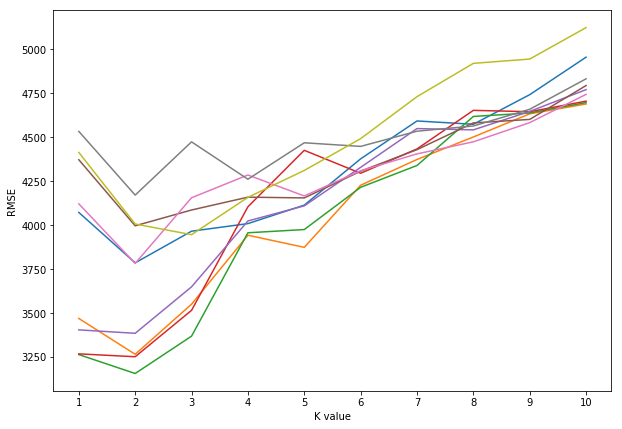

In [182]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(10,7))

for k, v in k_rmse_results.items():
    # As my schoolmates stated, using a dictionary would affect the order of the K and mess 
    # my plot. Better to use the order wanted and a list comprehension.
    x = list(v.keys())
    y = [v[i] for i in x]
    
    plt.plot(x,y)
    plt.xlabel('K value')
    plt.xticks(x)
    plt.ylabel('RMSE')

We notice that after having tuned the hyperparameters of our model the most effective model is: 
- k-value = 2
- features =["engine-size", "curb-weight", "horsepower", "city-mpg"]

Nontheless, to be completley sure about our results we should run the same workflow with a model that is trained on only the numerical data, thus excluding our data manipulation of several columns. This may yield a more accurate results as a simpler model may generlise better than a more complex one that tends to overfit. 

## 5.1 K-Fold Cross Validation

Another way of assessing the model can be by performing a K-Fold Cross Validation

In [183]:
from sklearn.model_selection import cross_val_score, KFold

In [186]:
def cross_val_knn(X,Y,df,max_k, max_folds):
    k_values = list(range(1,max_k))
    for k in k_values:
        num_folds = list(range(2,max_folds))
        for fold in num_folds:
            kf = KFold(fold, shuffle=True, random_state=1)
            knn = KNeighborsRegressor(n_neighbors=k)
            mses = cross_val_score(knn, df[X], df[Y], scoring="neg_mean_squared_error", cv=kf)
            rmses = np.sqrt(np.absolute(mses))
            avg_rmse = np.mean(rmses)
            std_rmse = np.std(rmses)
            print("K-value: ",str(k), "Folds: " ,str(fold), "Avg. RMSE: ", str(avg_rmse), "Std. RMSE: ", str(std_rmse))

Earlier we saw that our model presents diminishing returns, the higher our k-value is. Thus we created a function that allows us to execute K-Fold cross validtion to a specific max-unit of for our k-value.
Furthermore, because of the size of the dataset (circa 200 rows) we decided to set a K-Fold range from 2-10 as deafult).

Now thanks to the earlier insights we will analyse the results for K-Fold Cross Validation for our 4 best features and see how the rmse changes across k-values and folds. 

In [187]:
cross_val_knn(four_best_features, "price", data, 4, 10)

K-value:  1 Folds:  2 Avg. RMSE:  2928.9066890281833 Std. RMSE:  291.0391241189818
K-value:  1 Folds:  3 Avg. RMSE:  2505.0523094471178 Std. RMSE:  304.6854777742069
K-value:  1 Folds:  4 Avg. RMSE:  2690.2629614758716 Std. RMSE:  435.5660657361624
K-value:  1 Folds:  5 Avg. RMSE:  2506.1738518593806 Std. RMSE:  338.665351389723
K-value:  1 Folds:  6 Avg. RMSE:  2571.0982360143134 Std. RMSE:  351.91006197707827
K-value:  1 Folds:  7 Avg. RMSE:  2490.914770590495 Std. RMSE:  505.5722714895831
K-value:  1 Folds:  8 Avg. RMSE:  2499.9479727136895 Std. RMSE:  607.4759786907247
K-value:  1 Folds:  9 Avg. RMSE:  2328.4207076486073 Std. RMSE:  687.9433261910945
K-value:  2 Folds:  2 Avg. RMSE:  2903.820814182327 Std. RMSE:  346.0931610691184
K-value:  2 Folds:  3 Avg. RMSE:  2555.280079668472 Std. RMSE:  293.83742251013115
K-value:  2 Folds:  4 Avg. RMSE:  2568.5774603890845 Std. RMSE:  341.97521070402615
K-value:  2 Folds:  5 Avg. RMSE:  2633.282111431777 Std. RMSE:  369.75498277120334
K-val

We notice that by increasing the number of folds:
1. The avg. RMSE of our predictions decreases as we increase the number of folds.
2. At the same time the increase in accuracy across all folds is matched by an increase in the deviation of the individual predictions across folds. 

Overall we have to decide, what the best trade-off between variance and bias may be. Nevertheless, this goes beyond the scope of this project. 